<a href="https://colab.research.google.com/github/saiprashanthig/Math_Techniques_in_Data_Science/blob/main/7026874444_Sai_Prashanthi_HW2_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Student name: **[Sai Prashanthi G]**
*   UD ID: **[702687444]**
*   Collaborator(s): **[None]**

# MATH637-011 Homework 2 (10% total grade)

## **Deadline: 10/13/2023 11:59 PM**


We consider a neural network with two inputs, 1 hidden layer with 3 hidden nodes, and one output. We are using the ReLU activation function at the hidden nodes. Mathematically, this can be represented as:

$$
h = \sigma \left( W^T x + b\right), ~~~ z = V^T h + c
$$

where $\sigma$ denotes the ReLU activation and

$~~~~~~~~W =
\begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{bmatrix},~
$
$b =
\begin{bmatrix}
b_{1}\\
b_{2}\\
b_{3}
\end{bmatrix},
$
$V = \begin{bmatrix}
v_{1}  \\
v_{2}\\
v_{3}
\end{bmatrix}$, c

are the weights and the bias of the network. We will denote the output $z$ of this network as $f(\theta, x)$.

For a data point $(x, y)$, the loss function on this data point is defined as
$$
L(\theta, x, y) = [f(\theta, x) - y]^2.
$$

# **Part 1: Define the forward map** (3pts)

Write a Python function to compute the forward map of the network.

In [ ]:
import numpy as np

def relu(x):
  if (x<0):
    return 0
  else:
    return x

def forward_map(theta, x,y):
    # Extract parameters from theta
    w11, w12, w13, w21, w22, w23,b1,b2,b3, v1, v2, v3,c = theta #all weights

    # Extract input features
    x1, x2 = x

    # Compute intermediate values
    h1 = relu(w11 * x1 + w21 * x2 + b1)
    h2 = relu(w12 * x1 + w22 * x2 + b2)
    h3 = relu(w13 * x1 + w23 * x2+b3)
    z = v1 * h1 + v2 * h2 + v3 * h3 + c
    L= (z-y) **2
    return h1,h2,h3,z,L

# **Part 2: Back-propagation** (4pts)

Write a Python function to compute the derivative of  𝐿 with respect to all parameters of the network.

In [ ]:
def der_relu(x):
  if (x<0):
    return 0
  else:
    return 1

def der_L (theta,x,y):
  w11, w12, w13, w21, w22, w23,b1,b2,b3, v1, v2, v3,c = theta #all weights
  h1,h2,h3,z,L = forward_map(theta, x,y)
  x1,x2=x

  v1_d= 2*(z-y)*h1
  v2_d=2*(z-y)*h2
  v3_d=2*(z-y)*h3
  h1_d= 2*(z-y)*v1
  h2_d=2*(z-y)*v2
  h3_d=2*(z-y)*v3
  w11_d= h1_d*x1*der_relu(w11 * x1 + w21 * x2 +b1)
  w21_d= h1_d*x2*der_relu(w11 * x1 + w21 * x2+b1)
  w12_d= h2_d*der_relu(w12 * x1 + w22 * x2 + b2)*x1
  w22_d= h2_d*der_relu(w12 * x1 + w22 * x2 + b2)*x2
  w13_d= h3_d*der_relu(w13 * x1 + w23 * x2+b3)*x1
  w23_d= h3_d*der_relu(w13 * x1 + w23 * x2+b3)*x2
  b1_d= h1_d* der_relu(w11 * x1 + w21 * x2 + b1)
  b2_d= h2_d* der_relu(w12 * x1 + w22 * x2 + b2)
  b3_d= h3_d* der_relu(w13 * x1 + w23 * x2+ b3)
  c_d= 2*(z-y)
  return w11_d, w12_d, w13_d, w21_d, w22_d, w23_d,b1_d,b2_d,b3_d, v1_d, v2_d, v3_d,c_d # returns L differentiated wrt all weights

## **Part 3: Gradient descent** (3pts)

Consider the dataset of two data points:
*   $x_1 = \begin{bmatrix}
-1 \\
1
\end{bmatrix}$, and $y_1 = 60$.
*   $x_2 = \begin{bmatrix}
-1 \\
0.5
\end{bmatrix}$, and $y_2 = 20$.

Define
$$
J(\theta) = L(\theta, x_1, y_1) + L(\theta, x_2, y_2)$$

Implement the following procedure

*   Start at a random value of $\theta$
*   Perform 100 steps of gradient descent for the objective function $J(\theta)$ with learning rate $\rho = 0.005$
*   Plot the value of the objective function over the steps

Text(0.5, 0, 'Steps')

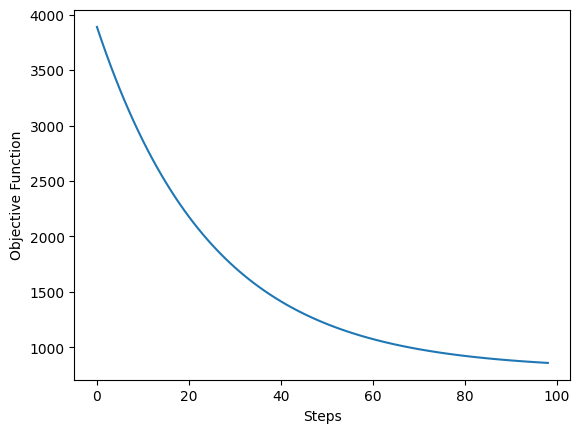

In [ ]:

def forward_map_1(theta, x,y):
    # Extract parameters from theta
    w11, w12, w13, w21, w22, w23,b1,b2,b3, v1, v2, v3,c = theta #all weights

    # Extract input features
    x1, x2 = x

    # Compute intermediate values
    h1 = relu(w11 * x1 + w21 * x2 + b1)
    h2 = relu(w12 * x1 + w22 * x2 + b2)
    h3 = relu(w13 * x1 + w23 * x2+b3)
    z = v1 * h1 + v2 * h2 + v3 * h3 + c
    L= (z-y) **2
    return L

import random
np.random.seed(25)
x1 = np.array([-1, 1])
y1 = 60
x2 = np.array([-1, 0.5])
y2 = 20
theta = np.random.uniform(-1,1, 13)


import matplotlib.pyplot as plt
values_J=[]
for i in range (1,100):
  gradient_J = np.array(der_L(theta, x1, y1)) + np.array(der_L(theta, x2, y2))
  theta = theta - 0.005 * gradient_J
  L1 = forward_map_1(theta, x1,y1)
  L2 = forward_map_1(theta, x2,y2)
  J= L1 + L2
  #print(J)
  values_J.append(J)
plt.plot(values_J)
plt.ylabel('Objective Function')
plt.xlabel('Steps')